In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import osmnx as ox
import gpxpy
import shapely

#from 
from planit.autotrail.process_gpx_data import *

from planit.autotrail.trailmap import TrailMap
from planit.autotrail import maptrails
from planit.osm_data import osm_process

In [2]:
place_name = "Boulder, CO"
place_name = 'Pasadena, CA'
#place_name = 'VT'

if place_name == 'Boulder, CO':
    north = 40.100141
    west  = -105.408908
    south = 39.841447
    east  = -105.163064
elif place_name == 'Pasadena, CA':
    north = 34.305256
    west  = -118.139268
    south = 34.166495
    east  = -117.862647
elif place_name == 'VT':
    center = (44.524050, -72.821687)
    
    north = center[0] + 0.075
    south = center[0] - 0.075
    east  = center[1] + 0.075
    west  = center[1] - 0.075

ll = (west,south)
rr = (east,north)

graph = ox.graph_from_bbox(north, south, east, west,retain_all=True)

                           

In [3]:
tmap = osm_process.process_ox(graph)
tmap.ensure_edge_attributes()

<IPython.core.display.Javascript object>


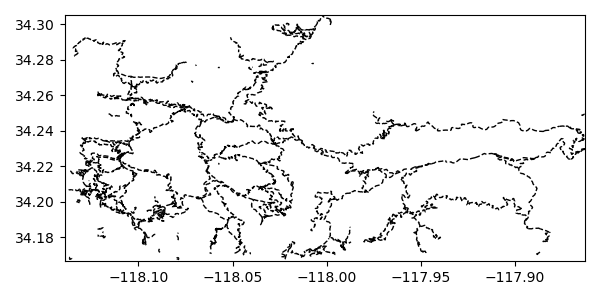

In [4]:
fig, ax = maptrails.plot_trails(tmap, fs = 6, 
                                ll=ll,rr=rr,
                                #nodes = possible_routes[0],
                                aspect=True)

In [5]:
tmap._adj[204371399][204371404]

{'osmid': 19686535,
 'highway': 'track',
 'oneway': False,
 'length': 133.333,
 'geometry': <shapely.geometry.linestring.LineString at 0x7f483766ec90>,
 'distance': 134.7305985862955,
 'elevation_gain': 0.0,
 'elevation_loss': 18.0,
 'elevation_change': 18.0,
 'min_grade': -15.477143970357327,
 'max_grade': -9.768973458692866,
 'average_grade': -13.359994083653481,
 'min_altitude': 379.0,
 'max_altitude': 397.0,
 'average_altitude': 388.6071288602107,
 'traversed_count': 0,
 'elevations': '3.95E+02,3.88E+02,3.81E+02',
 'grades': '-9.77E+00,-1.55E+01,-1.39E+01',
 'distances': '4.06E+01,6.06E+01,3.35E+01',
 'in_another_route': 0}

In [9]:
test_coord = (-118.13684, 34.2070) # echo mtn
#test_coord = (-72.78248, 44.51603) # VT - mansfield area

node_index, node_id = tmap.nearest_node( test_coord[0], test_coord[1])
m_in_mi = 1609.34
m_in_ft = 0.3048

dist          = 5.5  * m_in_mi
elev          = 0.0 * m_in_ft

start_node    = node_id[0]*1
end_node      = node_id[0]*1
target_values = {'distance' : dist} #, 'elevation_gain': elev}


#print(start_node, end_node, target_values)

totals, possible_routes, scores =\
      tmap.multi_find_route(start_node, 
                            target_values,
                            n_routes = 5,                            
                            end_node=end_node, reinitialize=True, reset_used_counter=True)

#tmap.write_gpx_file('test.xml',nodes=possible_routes)
#fig,ax=maptrails.plot_trails(tmap, nodes=possible_routes, show_profile = True, fs = 6)
#rprop = tmap.route_properties(nodes=possible_routes)


for r in possible_routes:
    _ = tmap.route_properties(nodes=r,verbose=True)

Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
         5.77          2371          2267          1725          3510        -49.19         66.47          0.00
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
         5.77          2371          2267          1725          3510        -66.47         66.47          0.00
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
         5.77          2371          2267          1725          3510        -66.47         66.47          0.00
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
         6.01          2496          2329          1725          3510        -49.19         66.47          0.00
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade 

<IPython.core.display.Javascript object>


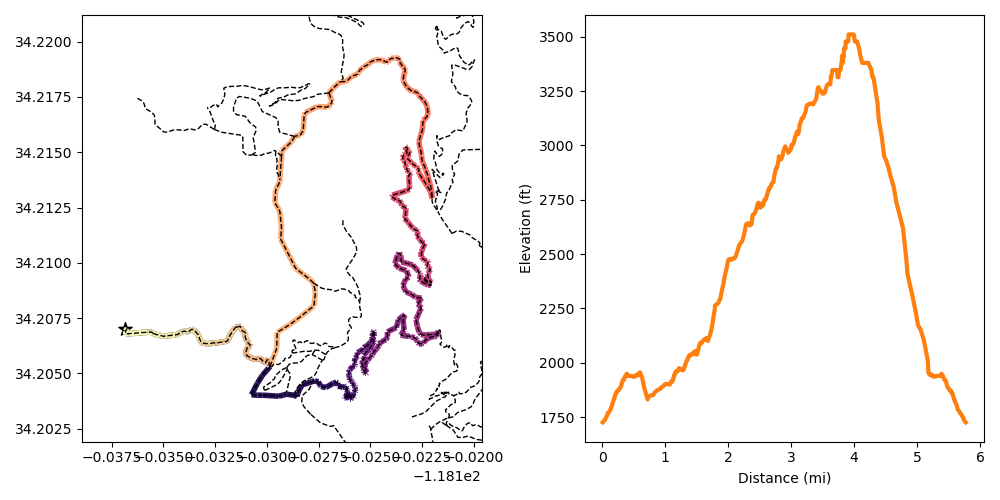

In [10]:

fig, ax = maptrails.plot_trails(tmap, fs = 5, 
                                #ll=ll,rr=rr,
                                nodes = possible_routes[0],
                                aspect=False)
ax[0].scatter(test_coord[0],test_coord[1], s = 100, color = 'black', marker = '*')


In [7]:
keys = []
for (u,v,d) in graph.edges(data=True):
    for k in d.keys():
        if not k in keys:
            keys.append(k)

In [8]:
keys

['osmid',
 'highway',
 'service',
 'access',
 'oneway',
 'length',
 'geometry',
 'name',
 'bridge',
 'distance',
 'elevation_gain',
 'elevation_loss',
 'elevation_change',
 'min_grade',
 'max_grade',
 'average_grade',
 'min_altitude',
 'max_altitude',
 'average_altitude',
 'traversed_count',
 'elevations',
 'grades',
 'distances',
 'maxspeed',
 'lanes',
 'ref',
 'junction']

In [9]:
for (u,v,d) in graph.edges(data=True):
    for k in keys:
        if not k in d.keys():
            print(k)
        

name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_

min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction

max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
geometry
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
n

lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_chang

lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
geometry
bridge
distance
elevation_gain
elevatio

distances
maxspeed
lanes
ref
junction
service
access
geometry
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elev

lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
mi

ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
maxspeed
lanes
ref
junction
service
access
bridge


access
geometry
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
service
access
geometry
name
bridge
distance
elevation_gain
elevation_loss
elevation_chan

access
bridge
maxspeed
lanes
ref
junction
service
access
bridge
maxspeed
lanes
ref
junction
service
access
bridge
maxspeed
lanes
ref
junction
access
geometry
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevat

max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades


maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
access
name
bridge
distance
elevation_gain
elevation_loss
elevation_change
min_grade
max_grade
average_grade
min_altitude
max_altitude
average_altitude
traversed_count
elevations
grades
distances
maxspeed
lanes
ref
junction
service
access
name
bridge
distance
elevation_gain
elevation

In [10]:
htypes = []
for (u,v,d) in graph.edges(data=True):
    if 'highway' in d.keys():
        if isinstance(d['highway'],list):
            for h in d['highway']:
                if not (h in htypes):
                    htypes.append(h)
        else:
            if not ( d['highway'] in htypes):
                htypes.append(d['highway'])
    else:
        if 'geometry' in d.keys():
            print(d)
            
print(htypes)

['service', 'unclassified', 'residential', 'tertiary', 'track', 'path', 'secondary', 'footway']


In [11]:
np.unique(htypes)

array(['footway', 'path', 'residential', 'secondary', 'service',
       'tertiary', 'track', 'unclassified'], dtype='<U12')

In [12]:
count = 0 
total = 0
for (u,v,d) in graph.edges(data=True):
    if d['highway'] == 'path':
        if not ('trail_visibility' in d.keys()):
            count = count + 1
        total = total+1
                
print(count/total)

1.0


In [13]:
any(np.array([len(x.coords[0]) for x in tmap.reduce_edge_data('geometry',function=None)])>2)

True

In [14]:
[c for c in x.coords]

NameError: name 'x' is not defined